In [1]:
import pandas as pd
import sys

In [2]:
# xls to xlsx
import win32com.client as win32

In [145]:
year = 2020
month = 6
weeks = 1
vegetable_name = '배추'
cnt = 0

while month >= 6 and month <= 11:
    globals()['Jeju_{}_{}'.format(month, year)] = []
    globals()['Seoul_{}_{}'.format(month, year)] = []
    globals()['Daejeon_{}_{}'.format(month, year)] = []
    globals()['Jeonju_{}_{}'.format(month, year)] = []
    
    try:
        while True:
            fname = "C:\\Users\\YSM\\Downloads\\{} {}년 {}월 {}주.xls".format(vegetable_name, year, month, weeks)
            excel = win32.gencache.EnsureDispatch('Excel.Application')
            wb = excel.Workbooks.Open(fname)

            wb.SaveAs(fname+"x", FileFormat = 51)
            wb.Close()
            excel.Application.Quit()
            df = pd.read_excel('C:\\Users\\YSM\\Downloads\\{} {}년 {}월 {}주.xlsx'.format(vegetable_name, year, month, weeks))

            weeks += 1

            length = 5

            # Seoul
            Seoul_price_list = []
            Seoul_idx = df[df['구분'] == '서울'].index
            Busan_idx = df[df['구분'] == '부산'].index
            Seoul_df = df.iloc[Seoul_idx.tolist()[0]:Busan_idx.tolist()[0]]
            Seoul_price = 0
            temp = Seoul_df[Seoul_df['Unnamed: 1'] == '경동'].index.tolist()[0]
            
            for i in range(length):
                x = Seoul_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Seoul_price_list.append(int(x))
                
            Seoul_avg = sum(Seoul_price_list) / (length - cnt)
            globals()['Seoul_{}_{}'.format(month, year)].append(round(Seoul_avg, 2))
            cnt = 0

            # Daejeon
            Daejeon_price_list = []
            Daejeon_idx = df[df['구분'] == '대전'].index
            Ulsan_idx = df[df['구분'] == '울산'].index
            Daejeon_df = df.iloc[Daejeon_idx.tolist()[0]:Ulsan_idx.tolist()[0]]
            Daejeon_price = 0
            temp = Daejeon_df[Daejeon_df['Unnamed: 1'] == '역전'].index.tolist()[0]
            
            for i in range(length):
                x = Daejeon_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Daejeon_price_list.append(int(x))
                
            Daejeon_avg = sum(Daejeon_price_list) / (length - cnt)
            globals()['Daejeon_{}_{}'.format(month, year)].append(round(Daejeon_avg, 2))
            cnt = 0

            # Jeonju
            Jeonju_price_list = []
            Jeonju_idx = df[df['구분'] == '전주'].index
            Suncheon_idx = df[df['구분'] == '순천'].index
            Jeonju_df = df.iloc[Jeonju_idx.tolist()[0]:Suncheon_idx.tolist()[0]]
            Jeonju_price = 0
            temp = Jeonju_df[Jeonju_df['Unnamed: 1'] == '남부'].index.tolist()[0]
            for i in range(length):
                x = Jeonju_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Jeonju_price_list.append(int(x))
            Jeonju_avg = sum(Jeonju_price_list) / (length - cnt)
            globals()['Jeonju_{}_{}'.format(month, year)].append(round(Jeonju_avg, 2))
            cnt = 0

            # Jeju
            Jeju_price_list = []
            Jeju_idx = df[df['구분'] == '제주'].index
            Jeju_df = df.iloc[Jeju_idx.tolist()[0]:]
            Jeju_price = 0
            temp = Jeju_df[Jeju_df['Unnamed: 1'] == '동문'].index.tolist()[0]
            for i in range(length):
                x = Jeju_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Jeju_price_list.append(int(x))
            Jeju_avg = sum(Jeju_price_list) / (length - cnt)
            globals()['Jeju_{}_{}'.format(month, year)].append(round(Jeju_avg, 2))
            cnt = 0

    except:
#         print(sys.exc_info())
        print("Month Over!")
        month += 1
        weeks = 1

Month Over!
Month Over!
Month Over!
Month Over!
Month Over!
Month Over!


In [146]:
Jeju_result = []
Seoul_result = []
Daejeon_result = []
Jeonju_result = []

In [155]:
Jeju_7_2020.reverse()

In [256]:
# ----------------------------- Jeju ---------------------------------- #
try:
    for i in range(4, -1, -1):
        Jeju_result.append(Jeju_10_2020[i])
except:
    for i in range(4):
        Jeju_result.append(Jeju_10_2020[i])

In [268]:
del Jeju_result[23]

In [261]:
Jeju_result

[6330.0,
 6330.0,
 6330.0,
 6330.0,
 6330.0,
 6330.0,
 6330.0,
 6330.0,
 6000.0,
 6000.0,
 6532.0,
 7330.0,
 8666.0,
 9264.0,
 9770.0,
 12034.0,
 13000.0,
 12470.75,
 12816.4,
 13600.0,
 9528.0,
 6333.33,
 6333.33,
 12470.75]

In [189]:
Seoul_10_2020.reverse()

In [196]:
# ----------------------------- Seoul ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Seoul_result.append(Seoul_10_2020[i])
except:
    for i in range(4):
        Seoul_result.append(Seoul_10_2020[i])

In [262]:
Seoul_result

[4796.0,
 4596.0,
 5032.0,
 5132.0,
 4830.0,
 4660.0,
 5550.0,
 7330.0,
 6862.0,
 7462.0,
 8196.0,
 9388.0,
 11800.0,
 11060.0,
 11920.0,
 13220.0,
 14300.0,
 12712.6,
 12984.0,
 8260.0,
 5730.0,
 4630.0,
 4630.0]

In [221]:
Daejeon_10_2020.reverse()

In [222]:
# ----------------------------- Daejeon ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Daejeon_result.append(Daejeon_10_2020[i])
except:
    for i in range(4):
        Daejeon_result.append(Daejeon_10_2020[i])

In [263]:
Daejeon_result

[4300.0,
 3300.0,
 3900.0,
 4200.0,
 4500.0,
 4500.0,
 5400.0,
 5875.0,
 6000.0,
 6600.0,
 7700.0,
 8300.0,
 9400.0,
 9300.0,
 9900.0,
 11600.0,
 11300.0,
 10350.0,
 10140.0,
 7600.0,
 5800.0,
 5500.0,
 4320.0]

In [230]:
Jeonju_7_2020.reverse()

In [239]:
# ----------------------------- Jeonju ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Jeonju_result.append(Jeonju_10_2020[i])
except:
    for i in range(4):
        Jeonju_result.append(Jeonju_10_2020[i])

In [246]:
Jeonju_result.append(Jeonju_11_2020[0])

In [264]:
Jeonju_result

[4466.0,
 4000.0,
 4000.0,
 4066.0,
 4066.0,
 4000.0,
 4400.0,
 4832.5,
 5330.0,
 5594.0,
 6800.0,
 7264.0,
 8530.0,
 8930.0,
 9060.0,
 9864.0,
 11040.0,
 10081.6,
 10078.8,
 7400.0,
 5200.0,
 3732.0,
 3732.0]

In [269]:
df_20 = pd.DataFrame([Jeju_result, Seoul_result, Daejeon_result, Jeonju_result], index='Jeju Seoul Daejeon Jeonju'.split())
df_2020 = df_20.fillna(df.iloc[1])
df_2020 = df_2020.T
df_2020

,Jeju,Seoul,Daejeon,Jeonju
0,6330.00,4796.0,4300.0,4466.0
1,6330.00,4596.0,3300.0,4000.0
2,6330.00,5032.0,3900.0,4000.0
3,6330.00,5132.0,4200.0,4066.0
4,6330.00,4830.0,4500.0,4066.0
5,6330.00,4660.0,4500.0,4000.0
6,6330.00,5550.0,5400.0,4400.0
7,6330.00,7330.0,5875.0,4832.5
8,6000.00,6862.0,6000.0,5330.0
9,6000.00,7462.0,6600.0,5594.0


In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

month_week_list = ['6/1', '6/2', '6/3', '6/4', '7/1', '7/2', '7/3', '7/4', '7/5', '8/1', '8/2', '8/3', '8/4', '9/1', '9/2', '9/3', '9/4', '10/1', '10/2', '10/3', '10/4', '10/5', '11/1']

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,4)

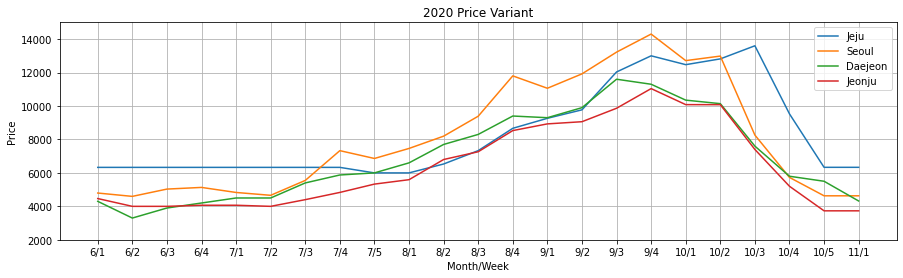

In [271]:
line = df_2020.plot.line()
line.set_xlabel("Month/Week")
line.set_ylabel("Price")
plt.ylim([2000, 15000])
line.set_title("2020 Price Variant")
line.set_xticks(df_2020.index[:])
line.set_xticklabels(month_week_list)
plt.plot
plt.show()

In [272]:
df20 = pd.DataFrame([Jeju_result, Daejeon_result, Jeonju_result], index='Jeju Daejeon Jeonju'.split())
df2020 = df20.fillna(df.iloc[1])
df2020 = df2020.T
df2020

,Jeju,Daejeon,Jeonju
0,6330.00,4300.0,4466.0
1,6330.00,3300.0,4000.0
2,6330.00,3900.0,4000.0
3,6330.00,4200.0,4066.0
4,6330.00,4500.0,4066.0
5,6330.00,4500.0,4000.0
6,6330.00,5400.0,4400.0
7,6330.00,5875.0,4832.5
8,6000.00,6000.0,5330.0
9,6000.00,6600.0,5594.0


In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

month_week_list = ['6/1', '6/2', '6/3', '6/4', '7/1', '7/2', '7/3', '7/4', '7/5', '8/1', '8/2', '8/3', '8/4', '9/1', '9/2', '9/3', '9/4', '10/1', '10/2', '10/3', '10/4', '10/5', '11/1']

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,4)

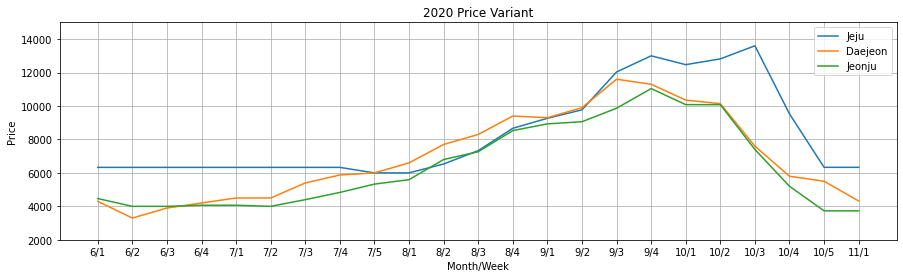

In [274]:
line2 = df2020.plot.line()
line2.set_xlabel("Month/Week")
line2.set_ylabel("Price")
plt.ylim([2000, 15000])
line2.set_title("2020 Price Variant")
line2.set_xticks(df_2020.index[:])
line2.set_xticklabels(month_week_list)
plt.plot
plt.show()